# **Homework 4: Extractive summarization**
[CS4740/LING4744/COGST4740/CS5740 Fall 2022](https://www.cs.cornell.edu/courses/cs4740/2022fa/)

**Created By:** Shaden Shaar and Tushaar Gangavarapu

><p align=center><span style="padding-right:3px; padding-top: 3px; display:inline-block;"><img src="https://static.wikia.nocookie.net/michaelbaystransformers/images/8/84/Dark_Of_The_Moon_Prime.jpg/revision/latest?cb=20210526040139", height="300"</span></p>
> 
><p align=center><i>We've suffered <u>losses</u>, but we've not lost the war.<br/></i>(Optimus Prime, Transformers)
</i></p>

**Deadlines**
<ul>

<li> Grouping deadline: <b>November 20, 2022</b>, 11:59pm on CMS (site will open as the deadline approaches, follow <a href="https://edstem.org/us/courses/26793">Ed</a>) 
<li> Project submission deadline: <b>December 5, 2022</b> 11:59pm

</ul> 

**Names:** Cong Liu, Menglin Wang

**Cornell NetIDs:** cl958, mw976

---
**Leaderboard for homework-4**: ROUGE-1 baseline is `0.400` and ROUGE-2 baseline is `0.185`.

---

<font color=orange>⚠ The following instruction is only applicable if you're using Google Colab to train and infer (which we recommend).</font>


> **Editing your version of this notebook on Colab**: One partner should make a copy of this notebook and share it with your partner. <font color='red'>However, because of synchronization issues (even though Colab works with Google Drive), changes made in this notebook at the same time from different computers/browser windows may not save.</font> We will go so far as to recommend that you close the tab with this notebook when you are not working on it so your partner doesn't face sync issues.
>
> **Running out of GPU on Google Colab?**: We recommend that you first implement all other functions on a CPU runtime and then switch to GPU when you train the final models. See [#743](https://edstem.org/us/courses/26793/discussion/2130275) to enable custom virtual compute engine for uninterrupted GPU support.

* ⚠ **Teams (groups)**: <font color=red>Everyone resets to a singleton when each new assignment is released.</font> If you want to have a partner for this homework, regardless of whether it's a previous homework partner or a new one, you must do the CMS invite/accept process anew.

* **Coding cells**: Any cells that require you to code will have one or more of the following comments (`description` varies per cell):
```
# TODO: description
# FIXME: description
# EXPLORE: description
```
While `TODO` and `FIXME` are graded, `EXPLORE` parts of the assignment are given for you to delve deeper into the underlying topic; `EXPLORE` topics could be anything from coding, to visualizations, to paper readings.

* **Cell outputs**: For grading (aka, to help us give you *partial* credit), please ensure the final cell outputs are present for all cells in the notebook (and the .pdf file) you submit.

* **Cornell code of academic integrity**: Do NOT copy code from online or share code with students other than your designated partner; we will be running programs to detect plagiarism. See [the policy on the course website](https://www.cs.cornell.edu/courses/cs4740/2022fa/) for the full code.

<font color=red>**What to submit?**</font>: You need to submit **three** main things:
1. Upload your `.ipynb` file to CMS (we do NOT accept `.py` files), 
2. The corresponding `.pdf` file (per usual, and please don't forget to paginate) to Gradescope-<font color='red'>written</font>,
3. Submit to the Gradescope-<font color='red'>autograder</font> (a different Gradescope than the one for the `.pdf` file), the zipped file created by running `./make_submission`, which contains:
   1. the post-processed `.py` code (generated after running the `make_submission` script),
   2. `LinearClassifierHead`-generated summaries in `.txt`, and 
   3. `MHAClassifierHead`-generated summaries `.txt`.

We don't anticipate the need for any other resources from you, but updates (should there be any) will be detailed prior to submission deadline on Ed.

<!-- [tg352 final check] points, starts check, releasing autograder or not? -->

<a name="outline"></a>
## **Assignment outline**
---

- [Setup](#setup)
  - [Install libraries](#install_libraries)
  - [Import libraries](#import_libraries)
  - [Helper functions and global variables](#helper)

- [Autograder and submission](#make)
  - [Make submission](#helper)
  - [Run autograder locally](#autograder)

- [Part 1: Evaluation metric](#part1)
  - <font color='red'>* </font>[1.1 ROUGE implementation](#rouge) (20 points)
  - [[Q1] ROUGE interpretation](#q1) (5 points)
  - [[Q2] Exploring the effects of ROUGE](#q2) (5 points)

- [Part 2: Data loading and preprocessing](#part2)
  - [2.1. Load dataset](#create_dataset) (0 points)
  - <font color='red'>* </font>[2.2. Implement brute-force search](#create_extractive_bf) (10 points)
  - <font color='red'>*</font> [2.3. Implement greedy search](#create_extractive_g) (10 points)
  - <font color='red'>*</font> [2.4. Obtain extractive labels](#create_extractive_g) (2 points)

- [Part 3: Transformer](#part3)
  - [3.1. Load tokenizer](#load_tokenizer) (2 points)
  - <font color='red'>*</font> [3.2. Mask and tokenize](#mask_tokenize) (20 points)
  - [3.3. Create a linear classifier head](#create_model_linear) (2 points)
  - [3.4. Create MHA classifier head](#create_model_mha) (15 points)
  
- [Part 4: Train and infer from linear classifier](#part4)
  - [4.1. Define linear classifier](#define_model_linear) (10 points)
  - <font color='red'>*</font> [4.2. Compute metrics](#create_compute_metric) (12 points)
  - [4.3. Trainer](#create_trainer_linear) (10 points)
  - <font color='orange'>! </font>[4.4. Inference](#inference_model_linear) (15 points)
  - [[Q3] Performance interpretation](#q3) (5 points)
  - [4.5. Leaderboard submission](#rouge_model_linear) (0 points)

- [Part 5: Train and infer from MHA classifier](#part5)
  - [5.1. Define and train MHA classifier](#define_train_mha) (2 points)
  - [5.2. Inference and Leaderboard submission](#inference_model_linear) (2 points)
  - [[Q4] Performance interpretation](#q4) (5 points)
  - [5.3. Visualization](#visualization) (10 points)
  - [[Q5] Attention plots](#q5) (20 points)

Leaderboard score above baseline (3 points)

<br/>

_<font color='red'>*</font> the module will be autograded. <font color='red'>Kindly note that you will be given the autograder in advance (on GitHub and on gradescope). Our current plan is to &nbsp;&nbsp;&nbsp;NOT allow for any partial credit if you fail the autograder. </font> Further, do NOT assume that passing the autograder guarantees full points, your code &nbsp;&nbsp;&nbsp;will also be tested for validity and occasionally, speed._

_<font color='orange'>!</font> the module will be partially autograded._



# **Overview** 
---



Summarization has been a long-standing challenge in natural language processing (NLP). To generate a short version of a document while retaining its most important information, we need a model capable of accurately extracting the key points while avoiding repetitive information. Fortunately, recent works in NLP such as the transformer models and language model pretraining have advanced the state-of-the-art in summarization. In this project, we will explore how to fine-tune transformer models (e.g., BERT) to do *extractive* summarization.

<a name="overview_dataset"></a>
## **Task definition**
The task of extractive summarization can be thought of as a binary classification problem, at the sentence level. For an article of $n$ ordered sentences, $a^{(i)} = \{s^{(1)}, s^{(2)}, \dots, s^{(n)}\}$, we want to assign, to each sentence, $s^{(i)}$, a label $y^{(i)} \in \{0, 1\}$, indicating whether the sentence $s^{(i)}$ is a part of the generated (extractive) summary (include when $y^{(i)} = 1$). 


<a name="overview_dataset"></a>
## **Dataset**
For our task, we will be using a news dataset, where the input document is a news article and the summary is a list of bullet points that represent the highlights of the articles. In essense, we can regard the highlights (bullet points) to be the summary of the article.

<u>Note</u>: The highlights (summary sentences) are NOT *extracted* from the article; rather, think of highlights as human-written summary notes for a given article, i.e., an "abstract" of the summary. An example demonstrating this is shown below:

**Article**: 
> A turkish court imposed the blocks because images of the deadly siege were being shared on social media and "deeply upset" the wife and children of mehmet selim kiraz, the hostage who was killed. A turkish court has blocked access to twitter and youtube after they refused a request to remove pictures of prosecutor mehmet selim kiraz held during an armed siege last week. He died in hospital after he was taken hostage by the far-left organisation, two of his captors were killed when security forces took back the building where the far-left group was holding him. After spending 269 days in a coma, elvan eventually died on march 11 last year. His death, and the subsequent investigation, have since become a rallying point for the country's far-left.

**Highlights (summary sentences)**:
> - Turkish court imposed blocks as images of siege shared on social media.
> - Images 'deeply upset' wife and children of hostage mehmet selim kiraz.
> - Prosecutor, 46, died in hospital after hostages stormed a courthouse.
> - Two of his captors were killed when security forces took back the building.

Since the dataset given to you is an "abstractive" summarization dataset ($\{(a^{(i)}, h^{(i)})\}$; $h^{(i)} = h_1^{(i)} + h_2^{(i)} + \cdots + h_m^{(i)}$ being the concatenation of the corresponding $m$ highlights), we need to first convert it to an "extractive" summarization dataset, i.e., into the format described above. 

To achieve this, we will implement a number of algorithms to obtain an extractive summary for each document. Before implementing such algorithms, we need to define a way that estimates to the "goodness" (quality) of the extracted summary with respect to the abstactive summary (also referred to as the "gold summary"). Formally, for a given $(a^{(i)}, h^{(i)})$ we need to retrieve an extractive summary that maximizes $\mathcal{R}(e^{(i)}, h^{(i)})$ for some $\mathcal{R}(\cdot)$; let us define this "evaluation metric" ($\mathcal{R}(\cdot)$).

<a name="overview_evalutation"></a>
## **Evaluation metric ($\mathcal{R}(\cdot)$)**

One of the primary challenges faced in summarization _evaluation_ is that it requires the existence of a set of a reference (gold) set of summaries. Automatic evaluation of summarization and translation tasks is a fascinating area of research. Through the years, the [ROUGE-N](https://aclanthology.org/W04-1013.pdf) family of metrics has emerged to be the standard choice of evaluation in summarization tasks, and it has the following properties:
- _ROUGE-N_ measures the overlap of $n$-grams between the predicted and gold summaries,
- _ROUGE recall_ normalizes the overlap by the length of the gold summary, and
- _ROUGE precision_ normalizes the overlap by the length of the predicted summary, thereby counteracting the failure of recall to account for consiceness. For example, a very long predicted summary could score a perfect recall despite having many superfluous or misleading words.

Additional description about ROUGE will be given provided as needed in the assignment. 

<font color='green'>`#EXPLORE`: For those curious, there are variants of ROUGE other than those used in this assignment, and you can explore in the original paper: [ROUGE: A Package for Automatic Evaluation of Summaries (Lin, C.)](https://aclanthology.org/W04-1013.pdf). (See the longest common subsequence (LCS) and multi-reference ROUGE sections.)</font>

<a name="overview_model"></a>
## **Model**

This assignment attempts to implement a part of the approach detailed in, [Text Summarization with Pretrained Encoders (Liu, Y. and Lapata, M.)](https://aclanthology.org/D19-1387.pdf). We won't follow the paper to the letter, but the major modeling component, the summarizer, is developed on the ideas presented within the paper.

<font color=green>`#EXPLORE`: The authors of the [paper](https://aclanthology.org/D19-1387.pdf) explore the implications of their proposed model (the one which you'll implement within this homework assignment) and make specific comments on the changes they introduce, and how the results were unreflective of their changes; it might be interesting to reason about these inferences.</font>

We will be using the BERT encoder as out pretrained base encoder (<font color=green>`#EXPLORE`: [Attention Is All You Need](https://arxiv.org/abs/1706.03762)$-$the paper is an excellent read; also check out the number of citations on the paper</font>). As mentioned earlier, the task of extractive summarization can be posed as a binary classification problem at the sentence level, i.e., either the sentence is a part of the summary ($= 1$), or not ($= 0$). 

Let us call now quantify the "usefulness" of a sentence with respect to the summary, which ultimately would help determine if the sentence is to be included in the summary. To this end, let us add a token `[CLS]` at the beginning of each sentence (this will be our "sentence essence" accumulator). Since these `[CLS]` tokens hold the representations of the entire sentence, it is natural that we classify these `[CLS]` tokens to determine the summary-included sentences. We can achieve this using a binary classifier layer atop of the encoder layers. As popularized by transformers, we will henceforth refer to these classifiers as "heads" (classifier heads), and you will implement a linear head (`LinearClassifierHead`) and a linear head with a multi-head attention layer (the `MHAClassifierHead`).

Let us visualize the model we will use in this assignment:

<img src="https://github.com/chriskhanhtran/minimal-portfolio/blob/master/images/bertsum.jpeg?raw=true">

As detailed earlier, it is easier to think of this task as a _token_ classification, but instead of classifying for every token, we are only interested in classifying the the `[CLS]` tokens added at the start of each sentence in the article. 

<a name="setup"></a>
[[^^^]](#outline)
# **Setup**
---
<font color='red'>Kindly note that any `import `, global variables, or any other helper functions should _only_ be specified here, in this section. Failing to do so, the `./make_submission` script will NOT be able include them in the final zipped submission file, and the autograder won't run.</font>


<a name="install_libraries"></a>
### **Install libraries**

In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a name="import_libraries"></a>
### **Import libraries**

In [ ]:
import os
import re
import math
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from typing import Optional
from collections import Counter

import torch
from torch import nn
from torch.nn import CrossEntropyLoss
from transformers import BertPreTrainedModel
from transformers.modeling_outputs import TokenClassifierOutput
from transformers import DataCollatorForTokenClassification
from transformers import AutoModel, AutoConfig, AutoTokenizer
from transformers import TrainingArguments, Trainer
from datasets import load_dataset
from itertools import combinations
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.utils import class_weight

nltk.download('punkt')
device = 'cuda' if torch.cuda.is_available() else 'cpu'
np.random.seed(1234)
torch.manual_seed(1234)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a name="helper"></a>
### **Helper functions and global variables**

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]

<a name="make"></a>
[[^^^]](#outline)
# **Autograder and submission**
---


<a name="submission"></a>
[[^^^]](#outline)

### **Make submission file**

In [ ]:
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## First lets unzip
# PATH_TO_MAKE_SUBMISSION="SET TO THE RIGHT PATH"
dirpath = '/content/drive/My\ Drive/CS\ 5740\ HWs/'
PATH_TO_MAKE_SUBMISSION = os.path.join(dirpath, 'make-submission.zip')
PATH_TO_AUTOGRADER = os.path.join(dirpath, 'autograder-local.zip')

!cd $dirpath; unzip $PATH_TO_MAKE_SUBMISSION
!cd $dirpath; unzip $PATH_TO_AUTOGRADER

Archive:  /content/drive/My Drive/CS 5740 HWs/make-submission.zip
replace make_submission.sh? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/My Drive/CS 5740 HWs/autograder-local.zip
replace run_autograder_local? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
## The make submission file will ask you for a few things: 
##    1) Path to this notebook
##    2) Path to the lineas_summaries.txt file (if not available then keep empty)
##    3) Path to the mha_summaries.txt file (if not available then keep empty)
notebook_filepath = 'UPDATED_FINAL_STUDENT_CS_4740_FA22_HW4.ipynb'
# linear_summaries_filepath = '../linear_summaries.txt'
# mha_summaries_filepath = '../mha_summaries.txt'

!cd $dirpath; ./make_submission.sh

/bin/bash: ./make_submission.sh: /usr/bin/env: bad interpreter: Permission denied


<font color='red'>**Note:** If the autograde is not working due to semantic errors you can start by fixing the notebook but id that doesnt work then you can manually edit the submission file `submission.py`. Just make sure you rerun the zip command.</font> 
```
linear_fp=PATH_TO_LINEAR_SUMMARIES
mha_fp=PATH_TO_MHA_SUMMARIES

zip -r gradescope-submission.zip submission.py requirements.txt $linear_fp $mha_fp
```

<a name="autograder"></a>
[[^^^]](#outline)

### **Run autograder locally**

To run the autograder you need first to run make-submission to create the final `submission.py` file that is has only the extracted classes and functions from this file. The autograder given is out of 29 points where the final autograder is out of 84 as some test cases will be hidden till the grades are published. 

In [ ]:
## First lets unzip, install requirments and prep the test files. 

# PATH_TO_AUTOGRADER="SET TO THE RIGHT PATH"
# PATH_TO_AUTOGRADER = os.path.join(dirpath, 'autograder-local.zip')

# !unzip PATH_TO_AUTOGRADER
# !pip install -r base-requirements.txt
# !pip install -r requirements.txt
# !chmod +x run_autograder_local 

# !cd $dirpath; unzip $PATH_TO_AUTOGRADER
!cd $dirpath; pip install -r base-requirements.txt
!cd $dirpath; pip install -r requirements.txt
!cd $dirpath; chmod +x run_autograder_local

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=6f59bdef5e6cff3f5bfe602772e3227798c6d3135e42395fc7c52317bfbee4ce
  Stored in directory: /root/.cache/pip/wheels/24/55/6f/ebfc4cb176d1c9665da4e306e1705496206d08215c1acd9dde
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c3d83da223b162dddd2cacce3b66e940f425aa02cb3b8e4139d490f61d82cc84
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built rouge-score sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
linear_summaries_filepath = 'linear_summaries.txt'
mha_summaries_filepath = 'mha_summaries.txt'

!cd $dirpath; zip -r gradescope-submission.zip \
    submission.py requirements.txt $linear_summaries_filepath \
    $mha_summaries_filepath

updating: submission.py (deflated 73%)
updating: requirements.txt (deflated 39%)
updating: linear_summaries.txt (deflated 60%)
updating: mha_summaries.txt (deflated 60%)


In [ ]:
## You can run the autograder
!cd $dirpath; ./run_autograder_local # the results can be found in results.json

Runing Locally
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
## View your scores
!cd $dirpath; cat results.json

{
    "tests": [
        {
            "name": "Public Test Case: Test bruteforce_search Implementation.",
            "score": 2,
            "max_score": 2,
            "status": "passed",
            "number": "2.2.3"
        },
        {
            "name": "Public Test Case: Test get_all_candidates Implementation.",
            "score": 2,
            "max_score": 2,
            "status": "passed",
            "number": "2.2.1"
        },
        {
            "name": "Public Test Case: Test get_all_candidates Handling of Edge Cases",
            "score": 1,
            "max_score": 1,
            "status": "passed",
            "number": "2.2.2"
        },
        {
            "name": "Public Test Case: Test accuracy correctness",
            "score": 1,
            "max_score": 1,
            "status": "passed",
            "number": "4.2.1"
        },
        {
            "name": "Public Test Case: Test f1 correctness",
            "score": 1,
            "max_score": 1,
    

<a name="part1"></a>
[[^^^]](#outline)

# **Part 1 - Evaluation Metric**
---


In essence, ROUGE (Recall-Oriented Understudy for Gisting Evaluation)attempts to compare how close a generated summary (aka _candidate summary_) is to a list of reference summaries (_gold summaries_). In this part of the assignment, you will implement a ROUGE-$N$ scorer.

Assuming that you have _only one_ gold summary, ROUGE-$N$ measures the number of matching $n$-grams between our model-generated summary (aka the candidate summary) and the (one) gold summary. The $N$ in ROUGE-$N$ denotes the value of $n$ in n-grams that we are using. For example, ROUGE-$1$ computes unigram matches, while ROUGE-$3$ computes trigram matches.

To compute the ROUGE-$N$ of a candidate summary text using _several_ gold summaries, you would retrieve the _maximum_ score of the individual ROUGE-$N$ between the candidate summary and each gold summary.

Since we are determining the $n$-gram overlap, we can compute the recall, precision and $F1$ score for each candidate-reference pair. In practice, we often use ROUGE-$N$-$F1$, since it is a combination of both the recall and precision. We provide a short reference guide below for your convenience:

**Recall**

The recall measures the fraction of overlapping $n$-grams occuring in both the model output and the gold summary, to the total number of $n$-grams in the gold summary. 

ROUGE-$N$-recall $= \frac{\text{n-grams that appear both in candidate and gold summary}}{\text{number of n-grams in the gold summary}}$

**Precision**

The precision measures the fraction of overlapping $n$-grams occuring in both the model output and the gold summary to the total number of $n$-grams in the model output.

ROUGE-$N$-precision $= \frac{\text{n-grams that appear both in the candidate and gold summary}}{\text{number of n-grams in the candidate summary}}$

**F1**

Since we have the recall and precision, we can compute the f1 score like usual.

ROUGE-$N$-$F1$ $= 2 \cdot \frac{\text{precision } \cdot \text{ recall}}{\text{precision } + \text{ recall}}$

In the following block of code, you will implement your own ROUGE computer!

<a name="rouge"></a>
[[^^^]](#outline) 

### **1.1: Implement Rouge**

In [ ]:
class MyRouge(object):
    def __init__(self, preprocess=None, ns=[1, 2]):
      if preprocess == None:
        self.preprocess=lambda s: re.sub(r'[^\w\s]','',s.lower())
      else:
        self.preprocess = preprocess
      self.ns = ns
      self.agg_scores = {}
      for n in ns:
          self.agg_scores[f'rouge-{n}'] = {
              'precision': [], 
              'recall': [], 
              'f1': []}

    def compute(self):
        scores = {}
        for rn in self.agg_scores:
            scores[f'{rn}'] = {k: np.mean(self.agg_scores[f'{rn}'][k]) for k in self.agg_scores[f'{rn}']}
        return scores

    def update(self, candidate, references):
        self.compute_rouge_(candidate, references)
  
    def update_batch(self, candidates, references):
        assert len(candidates) == len(references)
        for candidate, references_ in zip(candidates, references):
            self.update(candidate, references_)

    def compute_rouge_(self, candidate, references):
        for n in self.ns:
            scores = self.compute_rouge(candidate, references, n=n)
            for k in scores[f'rouge-{n}']:
                self.agg_scores[f'rouge-{n}'][k].append(scores[f'rouge-{n}'][k])
  
    def compute_rouge(self, candidate, references, n):
        ''' Compute the rouge score for one candidate generation against multiple
        references. 

        :param candidate: The candidate summary to compute a score for.
        :type candidate : str
        :param references: A list of all reference summaries to compute the 
                           candidate summary against.
        :type references : list(str)
        :param n: Determine what rouge-n should be performed
        :type n : int
        
        :returns: a dict with the values {'rouge-1': {
                                            'precision': 0.8539562289562289,
                                            'recall': 0.5528035775713794,
                                            'f1': 0.6512670305773754}
                                         }
        :rtype  : dict{str: dict{str: float}}
        '''
        if self.preprocess != None:
            candidate = self.preprocess(candidate)
            references = [self.preprocess(reference) for reference in references]
    
        # TO DO: Implement ROUGE-n metric function given a candidate summary and a 
        #        list of of reference summaries. 
        output = {
            f'rouge-{n}': {'precision' : 0, 'recall' : 0, 'f1': 0}
        }
    
        candidate_tokens = candidate.split()

        references_tokens = [r.split() for r in references]
        candidate_n_grams = list(zip(*[candidate_tokens[i:] for i in range(n)]))
        #print(candidate_n_grams)
        references_n_grams = [list(zip(*[rt[i:] for i in range(n)])) for rt in references_tokens]
        cc = Counter(candidate_n_grams)
        max = 0
        precision = 0
        recall = 0
        for i in references_n_grams:
            cr = Counter(i)
            cur = 0
            for j in cr:
                if cc[j] > 0:
                    cur += min(cc[j], cr[j])
            if cur > max:
                max = cur
                precision = max / len(candidate_n_grams)
                recall = max / len(i)

        if max > 0:
            output = {
                f'rouge-{n}': {'precision' : precision, 'recall' : recall, 'f1': 2 * precision * recall / (precision + recall)}
            } 
        return output

In [ ]:
# Test your implementation

candidate_batch = ["he began by starting a five person war cabinet and included chamberlain as lord president of the council",
                   "the siege lasted from 250 to 241 bc, the romans laid siege to lilybaeum",
                   "the original ocean water was found in aquaculture"]

references_batch = [["he began his premiership by forming a five-man war cabinet which included chamberlain as lord president of the council"],
                    ["the siege of lilybaeum lasted from 250 to 241 bc, as the roman army laid siege to the carthaginian-held sicilian city of lilybaeum", "he began his premiership by forming a five-man war cabinet which included chamberlain as lord president of the council"],
                    ["the original mission was for research into the uses of deep ocean water in ocean thermal energy conversion (otec) renewable energy production and in aquaculture", "he began his premiership by forming a five-man war cabinet which included chamberlain as lord president of the council", "the siege of lilybaeum lasted from 250 to 241 bc, as the roman army laid siege to the carthaginian-held sicilian city of lilybaeum"]]

# candidate_batch = ["We are told that we need to add more features to the current interface if we want to achieve a better user experience"]
# references_batch = [["We are told to add more features"]]

rouge = MyRouge(ns=[1, 2])
rouge.update_batch(candidate_batch, references_batch)
print(f"The average ROUGE scores on batch:\n{rouge.compute()}")

# If your rouge is correct it should output the following:
# >>> {'rouge-1': {
# ...     'precision': 0.8604497354497355, 
# ...     'recall': 0.5273531655225019, 
# ...     'f1': 0.6279006279006278}, 
# ...  'rouge-2': {
# ...     'precision': 0.5244559362206421, 
# ...     'recall': 0.32954545454545453, 
# ...     'f1': 0.38832565284178194}
# ... }

The average ROUGE scores on batch:
{'rouge-1': {'precision': 0.8604497354497355, 'recall': 0.5273531655225019, 'f1': 0.6279006279006278}, 'rouge-2': {'precision': 0.5244559362206421, 'recall': 0.32954545454545453, 'f1': 0.38832565284178194}}


In [ ]:
# Explore
article_sents = [
  '03:37 est , 27 september 2013',
  'three out of four london ladies choose oversized tote bags , perhaps inspired by the likes of style guru victoria beckham , who is regularly pictured with hermes birkins and louis vuitton over-sized speedys .',
  'natelle baddeley , head of accessories at debenhams , said : ` we are noticing a new trend among londoners known as the " 24 hour " handbag .',
  'northerners are all about the sexy clutch bag , channelling their inner cheryl cole and packing all their essentials into a small bag that can take them from desk to dance floor .',
  'practical : scottish women love a stylish satchel while their cambrian cousins prefer a sporty rucksack',
  'safety-savvy scots opt for a crossbody bag - a female version of the wallet chain - which allows them to carry no more than a credit card and a lip gloss .'
]
summary = "those living in the north of england are most likely to carry clutches. londoners , by contrast , rely on gargantuan ' 24-hour ' tote bags . practical scots plump for crossbody bags and satchels . most sporty are the women of wales who love rucksacks ."

<a name="q1"></a>
[[^^^]](#outline) 

### **Q1: ROUGE score interpretation**

Give a realistic example of gold summary and predicted extractive summary for each of the following cases:
1. the generated summary has a high ROUGE-$2$-recall but low ROUGE-$2$-precision. 
2. the generated summary has a low ROUGE-$2$-recall but high ROUGE-$2$-precision. 


#### **A1:** 
1. the generated summary has a high ROUGE-2-recall but low ROUGE-2-precision

    predicted extractive summary = ["We are told that we need to add more features to the current interface if we want to achieve a better user experience"]

    gold summary = [["We are told to add more features"]]

    In the example above, the ROUGE-2-recall is 0.833 while the ROUGE-2-precision is 0.227

2. the generated summary has a low ROUGE-2-recall but high ROUGE-2-precision.

    predicted extractive summary = ["My friend will not attend the lecture today"]

    gold summary = [["My friend said he will not attend the lecture today because he has to attend a conference out of town"]]

    In the example above, the ROUGE-2-recall is 0.316 while the ROUGE-2-precision is 0.857

<a name="q2"></a>
[[^^^]](#outline) 

### **Q2: Exploring the effects of ROUGE**

Explore the effects of $N$ on the number of summary sentences chosen and the quality of the extracted summary. You can use quantitative (plots, visualizations, metrics, etc.) and qualitative (number of critical sentences chosen, etc.) approaches to justify the observations. 

_Hint: For this question, you may choose to experiment with articles from outside the news domain, particularly in healthcare domain (or any other domain with highstake situations), and make note of your observations on the summaries generated._

#### **A2:** 
We did the qualitative approach to analyze. We use the article example from the greedy search, which has 6 candidate summaries. We set the max sentence to include is 6, and We loop the N from 1 to 5 to extract the labels. Finally we get: $[0, 1, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]$.

We find that when N increasing, it is harder to hit the standard for inclusion, thus the number of summary chosen is decreasing. But we find the quality of the extracted summary when N =2 is better than when N=1. This is aligned with our assumption: the larger N, the less chosen sentence; The larger N, the more quality of the summary

<a name="part2"></a>
[[^^^]](#outline)
# **Part 2 - Data Loading and Preprocessing**
---

As described earlier, we need to convert the summarization dataset from being an _abstractive_ summarization dataset to an _extractive_ one. We will do this by looking over all possible subsets of sentences in the article and comparing it with the abstractive summary using the following evaluation metric:

$\mathcal{R(e^{(i)}, h^{(i)})} =$ ROUGE-$1$-$F1(e^{(i)}, h^{(i)})$ $+$ ROUGE-$2$-$F1(e^{(i)}, h^{(i)})$

In this part, you will:
1. load the (abstractive summarization) dataset,
2. implement _brute-force search_ to find the extractive summary labels from the article and its abstractive summary,
3. implement _greedy search_ to find the extractive summary labels from the article and its abstractive summary, and
4. using _greedy search_, process the dataset to obtain the extractive summary labels.

<a name="create_extractive_dataset"></a>
[[^^^]](#outline) 
### **2.1: Load dataset**

To load the dataset you can use the HuggingFace dataset loaders to create a HuggingFace `Dataset` object. For reference, use their documentation on [Load: Local and remote files](https://huggingface.co/docs/datasets/loading#local-and-remote-files).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = os.path.join(os.getcwd(), "drive", "My Drive", "CS 5740 HWs", "data")

train_fp = os.path.join(path, 'train.jsonl')
val_fp = os.path.join(path, 'val.jsonl')
test_fp = os.path.join(path, 'test.jsonl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# TO DO: Using the HuggingFace load_dataset load the train and validation datasets. 
train_dataset = load_dataset("json", data_files=train_fp)
val_dataset = load_dataset("json", data_files=val_fp)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

<a name="create_extractive_bf"></a>
[[^^^]](#outline) 
### **2.2: Implement brute-force algorithm to obtain extrative summarization labels**

To obtain the labels that comprise an extractive summary, the simplest (and most accurate) solution is to perform a brute-force search on all the possible combinations of sentences in the article. 

The _brute-force search_ solution should perform the following steps:
1. `get_all_candidates(*args, **kwargs)`: Get all possible subsets of sentences in the article.
2. `bruteforce_search(*args, **kwargs)`: 
    1. Exhaustively go through every subset between the sizes, `min` and `max` (both inclusive), and create candidate summaries by concatenating the sentences in the list,
    2. Get the rouge score ($\mathcal{R} =$ ROUGE-$1$-$F1$ $+$ ROUGE-$2$-$F1$) between every candidate and gold summary, and 
    3. Find the subset of sentences that maximizes $\mathcal{R}$.

$\mathcal{R}$ is computed using the ROUGE implemented in the previous section.


In [ ]:
def get_all_candidates(sents, min=1, max=-1):
    ''' Get all possible subsets of sentences of size min <= |set| <= max.

        :param sents: list of sentences
        :type sents : list(str)
        :param min: the minimum size of the subset, inclusive. 
        :type min : int
        :param max: the minimum size of the subset, inclusive. 
        :type max : int
        
        :returns: list of all possible subset of sentences in the format of a list. 
        :rtype  : list(list(str))
    '''
    # TO DO: Get all sets with the possible combinations of sentences sents such that
    #        min <= |set| <= max, for each set in combinations of sentences. 
    #        If max = -1, then set max to len(article_sents).
    if max == -1 or max > len(sents):
        max = len(sents)
    all_candidates = []
    for i in range(min, max + 1):
        # all_candidates.extend(list(c) for c in combinations(sents, i))
        all_candidates.extend(combinations(sents, i))
    return all_candidates

In [ ]:
# Test your implementation

fake_sents = ['A','B','C', 'D']

fake_sents_subsets = get_all_candidates(fake_sents, min=1, max=3)
print(f"All possible subsets of sentences of size [min, max] :\n{fake_sents_subsets}")

# If your `get_all_candidates` is correct it should output the following:
# >>> [('A',), ('B',), ('C',), ('D',),
# ...  ('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D'),
# ...  ('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'C', 'D'), ('B', 'C', 'D')]

All possible subsets of sentences of size [min, max] :
[('A',), ('B',), ('C',), ('D',), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'C', 'D'), ('B', 'C', 'D')]


In [ ]:
def bruteforce_search(sents, reference, scorer, min=1, max=-1):
    ''' Brute-force search that goes through all subsets of sentences such that 
      min <= |subset| <= max and determines the subset with the highest 
      (rouge-1-f1 + rouge-2-f1) agaisnt reference. 

        :param sents: list of sentences
        :type sents : list(str)
        :param reference: the reference summary that is used to compare and 
                          determine the best extractive summary. 
        :type reference : str
        :param min: the minimum size of the subset, inclusive. 
        :type min : int
        :param max: the maximum size of the subset, inclusive. 
        :type max : int
        
        :returns: list of 0s and 1s; indicating what sentences are considered
                  as part of the final summary. The output should 
                  have the same size as |sents|; such that it is a 1 for the 
                  sentence that part of the last summary and 0 otherwise.
        :rtype  : list(int)
    '''
    # TO DO: Implement a bruteforce search algorithm to get best extractive summary 
    #        given a reference abstractive summary. Choose the subset with the 
    #        highest (rouge-1-f1 + rouge-2-f1) score. 
    labels = [0 for _ in range(len(sents))]
  
    map = {}
    index = 0
    for s in sents:
        map[s] = index
        index += 1

    sents_subsets = get_all_candidates(sents, min, max)
    highest_score = 0
    best_subset = None
    for i in sents_subsets:
        concat = ' '.join(i)
        scorer.compute_rouge_(concat, [reference])
        cur_score = 0
        for n in scorer.ns:
            cur_score += scorer.agg_scores[f'rouge-{n}']['f1'][-1]
        if cur_score > highest_score:
            highest_score = cur_score
            best_subset = i

    if best_subset is not None:
        for s in best_subset:
            labels[map[s]] = 1
    return labels

In [ ]:
%%time

# Test your implementation

article_sents = [
  '03:37 est , 27 september 2013',
  'three out of four london ladies choose oversized tote bags , perhaps inspired by the likes of style guru victoria beckham , who is regularly pictured with hermes birkins and louis vuitton over-sized speedys .',
  'natelle baddeley , head of accessories at debenhams , said : ` we are noticing a new trend among londoners known as the " 24 hour " handbag .',
  'northerners are all about the sexy clutch bag , channelling their inner cheryl cole and packing all their essentials into a small bag that can take them from desk to dance floor .',
  'practical : scottish women love a stylish satchel while their cambrian cousins prefer a sporty rucksack',
  'safety-savvy scots opt for a crossbody bag - a female version of the wallet chain - which allows them to carry no more than a credit card and a lip gloss .'
]
summary = "those living in the north of england are most likely to carry clutches. londoners , by contrast , rely on gargantuan ' 24-hour ' tote bags . practical scots plump for crossbody bags and satchels . most sporty are the women of wales who love rucksacks ."

rouge_scorer = MyRouge(ns=[1, 2])
labels = bruteforce_search(article_sents, summary, rouge_scorer, min=1, max=3)
print(f"The labels for the article:\n{labels}")

# If your `bruteforce_search` is correct it should output the following:
# >>> [0, 1, 0, 0, 1, 1]

The labels for the article:
[0, 1, 0, 0, 1, 1]
CPU times: user 8.84 ms, sys: 0 ns, total: 8.84 ms
Wall time: 8.83 ms


<a name="create_extractive_g"></a>
[[^^^]](#outline) 
### **2.3: Implement greedy algorithm to obtain extrative summarization labels**

Since the brute-force search goes through all possible subsets, the time and computational complexity is _quite significant_. Therefore, in this section, we implement an alternate, greedy search approach, to reduce the compute time. 

Both the search algorithms implemented in this assignment follow the problem of largest subset summation in an array. To implement the greedy search, you need to find a subset of sentences that maximizes the ROUGE score. 

Here we provide a pseudocode that can help you implement the greedy search.

```
greedy_search(sents, reference, max):
  ids = []
  Loop until you get the max num of setences for your summary:
      1. Loop through all the sentences until you find a sentence that has a better ROUGE when added to ids.
      2. If you don't find such a sentence, then return ids
      3. If you do find such sentence, then add it to ids and keep going
```

<font color='red'>Note that you _will_ be tested on both the runtime and correctness.</font>


In [ ]:
def greedy_search(sents, reference, scorer, max=3):
    ''' The problem here is similar to maximum subset summation problem 
      (what subset of an array gives the m=highest value). 

        :param sents: list of sentences
        :type sents : list(str)
        :param reference: the reference summary that is used to compare and 
                          determine the best extractive summary. 
        :type reference : str
        :param max: the maximum size of the subset, inclusive. 
        :type max : int
        
        :returns: list of 0s and 1s; indicating what sentences are considered
                  as part of the final summary. The output should 
                  have the same size as |sents|; such that it is a 1 for the 
                  sentence that should be part of the summary and 0 otherwise.
        :rtype  : list(int)
    '''
    # TODO: Implement a gready search algorithm to get best extractive summary 
    #        given a reference abstractive summary. 
    labels = [0 for _ in range(len(sents))]

    map = {}
    index = 0
    for s in sents:
        map[s] = index
        index += 1
    
    ids = []
    best_subset = set()
    highest_score = 0
    while len(ids) < max:
        new = None
        for i in range(len(sents)):
            if sents[i] not in best_subset:
                cur_subset = best_subset.copy()
                cur_subset.add(sents[i])
                concat = ' '.join(cur_subset)
                scorer.compute_rouge_(concat, [reference])
                cur_score = 0
                for n in scorer.ns:
                    cur_score += scorer.agg_scores[f'rouge-{n}']['f1'][-1]
                if cur_score > highest_score:
                    highest_score = cur_score
                    new = i
    
        if new is not None:
            ids.append(new)
            best_subset.add(sents[new])
        else:
            break

    for id in ids:
        labels[id] = 1

    return labels

In [ ]:
%%time

# Test your implementation

article_sents = [
  '03:37 est , 27 september 2013',
  'three out of four london ladies choose oversized tote bags , perhaps inspired by the likes of style guru victoria beckham , who is regularly pictured with hermes birkins and louis vuitton over-sized speedys .',
  'natelle baddeley , head of accessories at debenhams , said : ` we are noticing a new trend among londoners known as the " 24 hour " handbag .',
  'northerners are all about the sexy clutch bag , channelling their inner cheryl cole and packing all their essentials into a small bag that can take them from desk to dance floor .',
  'practical : scottish women love a stylish satchel while their cambrian cousins prefer a sporty rucksack',
  'safety-savvy scots opt for a crossbody bag - a female version of the wallet chain - which allows them to carry no more than a credit card and a lip gloss .'
]
summary = "those living in the north of england are most likely to carry clutches. londoners , by contrast , rely on gargantuan ' 24-hour ' tote bags . practical scots plump for crossbody bags and satchels . most sporty are the women of wales who love rucksacks ."

rouge_scorer = MyRouge(ns=[1, 2])
labels = greedy_search(article_sents, summary, rouge_scorer, max=3)
print(f"The labels for the article:\n{labels}")

# If your `greedy_search` is correct it should output the following:
# >>> [0, 1, 0, 0, 1, 1]

The labels for the article:
[0, 1, 0, 0, 1, 1]
CPU times: user 4.17 ms, sys: 21 µs, total: 4.19 ms
Wall time: 4.2 ms


In [ ]:
article_sents = [
  '03:37 est , 27 september 2013',
  'three out of four london ladies choose oversized tote bags , perhaps inspired by the likes of style guru victoria beckham , who is regularly pictured with hermes birkins and louis vuitton over-sized speedys .',
  'natelle baddeley , head of accessories at debenhams , said : ` we are noticing a new trend among londoners known as the " 24 hour " handbag .',
  'northerners are all about the sexy clutch bag , channelling their inner cheryl cole and packing all their essentials into a small bag that can take them from desk to dance floor .',
  'practical : scottish women love a stylish satchel while their cambrian cousins prefer a sporty rucksack',
  'safety-savvy scots opt for a crossbody bag - a female version of the wallet chain - which allows them to carry no more than a credit card and a lip gloss .'
]
summary = "those living in the north of england are most likely to carry clutches. londoners , by contrast , rely on gargantuan ' 24-hour ' tote bags . practical scots plump for crossbody bags and satchels . most sporty are the women of wales who love rucksacks ."
rouge_scorers= []
for i in range(1, 6):
  rouge_scorers.append(MyRouge(ns = [i]))
res= []
for s in rouge_scorers:
  label= greedy_search(article_sents, summary, s, max=5)
  res.append(label)
print(res)

[[0, 1, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


<a name="get_extractive"></a>
[[^^^]](#outline) 
### **2.4: Obtain extractive labels for the datasets**


Now that you have implemented the greedy search algorithm, it is time to apply the changes to the datasets. Since the dataset is a HuggingFace `Dataset` object, use their built-in [process functions](https://huggingface.co/docs/datasets/process) to add an entry (`labels`) to every example in the dataset representing the extractive summarization labels.

<font color=red>Note that the labels are extracted using the greedy search approach, and NOT the brute-force approach.</font>

In [ ]:
def process_labels_fn(example, labels_selector=greedy_search, max=3, 
                      is_test=False):
    ''' Obtain extractive summary labels from the abstractive summary for each 
      example in the dataset. 

        :param example: dictionary representing one article/summary pair.
        :type example : dict{str: ...}
        :param labels_selector: the search function that outputs labels for a 
                                given example article.
        :type labels_selector : function
        :param max: the maximum size of the subset, inclusive. 
        :type max : int
        
        :returns: add an entry to the example dictionary, 'labels' that has the 
                  extractive labels. 
        :rtype  : dict{str: ...}
    '''
    try:
        obj = eval(example['text'])
    except:
        obj = example
    
    # TODO: Obtain the labels using the greedy search.
    if is_test:
        obj['labels'] = [0 for _ in range(len(obj['text']))]
    else:
        obj['labels'] = labels_selector(obj['text'], obj['summary'], MyRouge(ns=[1, 2]), max)
    return obj

In [ ]:
# TODO: Apply the process_labels_fn to the train and validation dataset. 
# TIME: It should take around 2-3 minutes
train_dataset = train_dataset['train'].map(process_labels_fn)
val_dataset = val_dataset['train'].map(process_labels_fn)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/2000 [00:00<?, ?ex/s]

In [ ]:
print(train_dataset[0])

{'text': ["it was a moment of madness that nearly claimed this woman 's life .", 'realising her mistake as the waves bear down on her , the woman can be seen running across the beach to try and make it before the tide', 'but it is too late .', 'the water sweeps her off her feet and she is carried along by the waves', 'as she is swept away , one bypasser made a desperate effort to reach her with an umbrella .', 'luckily , she later emerged battered and bruised but alive'], 'summary': 'woman was swept away in santander as waves swept in . witness tried to reach her with umbrella but failed . she later emerged from water battered but alive .', 'labels': [0, 0, 1, 0, 1, 1]}


<a name="part3"></a>
[[^^^]](#outline)
# **Part 3 - Model**
---

As described in the [Overview: Model](#overview_model) section, we want to fine-tune a transformer model (BERT) to perform a token classification task where you only classify the `CLS` tokens which separates each sentence in the article. 

In-order to train such model we need to do a few things:
1. **`tokenize_and_mask`**: Insert `[CLS]` token at the beginning of every sentence in the article, and add `[SEP]` token at the end of every sentence in the article
2. **`tokenize_and_mask`**: Tokenize the sentences in the article with your loaded tokenizer.
3. **`tokenize_and_mask`**: Add `token_type_ids` to the sentences of the article, such that you alternate between 0 and 1 for each sentence. 
5. **`LinearClassifierHead`, `MHAClassifierHead`**: Create a classifier head that will be attached at the top of the transformer encoder.

First we give you the main architecture of the model defined in the class `BertForTokenClassification`. 

In [ ]:
class BertForTokenClassification(BertPreTrainedModel):
    def __init__(self, config, bert, classifier, num_labels):
        super().__init__(config)
        self.num_labels = num_labels
        self.config = config
        self.bert = bert
        classifier_dropout = (
            config.classifier_dropout if config.classifier_dropout is not None else config.hidden_dropout_prob
        )
        self.dropout = nn.Dropout(classifier_dropout)
        self.classifier = classifier

    def forward(self,
                input_ids: Optional[torch.Tensor] = None,
                attention_mask: Optional[torch.Tensor] = None,
                token_type_ids: Optional[torch.Tensor] = None,
                position_ids: Optional[torch.Tensor] = None,
                labels: Optional[torch.Tensor] = None,
                return_dict: Optional[bool] = None, 
                output_attentions=False):

        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            return_dict=return_dict,
            output_attentions=output_attentions
        )

        sequence_output = outputs[0]
        

        sequence_output = self.dropout(sequence_output)
        # print(self.classifier)
        logits, cls_attentions = self.classifier(sequence_output)
        # print(logits, cls_attentions)
        
        loss = None
        if labels is not None:
            loss_fct = CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        all_outputs = TokenClassifierOutput(loss=loss, logits=logits, 
                                            hidden_states=outputs.hidden_states,
                                            attentions=outputs.attentions)
        if output_attentions:
            all_outputs = (all_outputs, cls_attentions)
        return all_outputs

<a name="load_tokenizer"></a>
[[^^^]](#outline) 

### **3.1: Load BERT Config and Tokenizer**

Simple use HuggingFace [AutoClasses](https://huggingface.co/docs/transformers/model_doc/auto) to load the config object and the tokenizer for the model, `bert-base-uncased`.

*NOTE: Please use the variable `model_name` instead of manually typing `bert-base-uncased` to eliminate errors related to model mismatch. 

In [ ]:
model_name = "bert-base-uncased"

# TO DO: load the tokenizer and the config of the model model_name.
BERT_config = AutoConfig.from_pretrained(model_name)
BERT_tokenizer = AutoTokenizer.from_pretrained(model_name)

<a name="mask_tokenize"></a>
[[^^^]](#outline) 

### **3.2: Mask and Tokenize the Dataset**

Now that the datasets has `text`, `labels`, and `summary`, we need to process the input further before being able to pass it through the model. To do so, we first write a processing function that converts the examples in the datasets to include `input_ids`, `attention_masks`, `labels`, `token_type_ids` and `position_ids`. 

Here is a detailed description of what each entry represents:
1. **`input_ids`**: The tokenization of the article; where the article is a concatenation of all sentences in `example['text']` with a `[SEP_token] [CLS_token]` in between every sentence. Make sure that the examples are padded to max_length.
2. **`attention_masks`**: The mask outputted by the tokenizer once the article is tokenized.
3. **`labels`**: An array that has the same shape as the `input_ids` such that it is a 0/1 in the same position as the `[CLS]` token in `input_ids` and mask out every other token. *Hint:* Look at PyTorch implementation of the loss functions.
4. **`token_type_ids`**:  An array that has the same shape as the `input_ids` such that all tokens belonging to `sent_i` has the value `i % 2`. 
5. **`position_ids`**:  An array that has the same shape as the `input_ids` such that each token has an id that range from `[0, len(input_ids))`. 


*Hint: Look at the documentation and the output of the [BERT tokenizer](https://huggingface.co/docs/transformers/glossary#position-ids) and the preprocessing process in this [Token classification Tutorial](https://huggingface.co/docs/transformers/tasks/token_classification#preprocess).*

In [ ]:
def tokenize_and_mask(examples, tokenizer, max_length=512):
    ''' Obtain tokenization of the input article and create the target token
        token classification labels such that you mask out the labels for all 
        tokens that are not a [CLS] token. 

        :type examples : dict{'text': list(list(string)), 'labels': list(list(ints))}
        :type tokenizer : huggingface tokenizer object
        
        :returns: add multiple entries that represent, 
                  input_ids - tokenization of the concatenation of the sentences 
                              in every article with a 'tokenizer.SEP tokenizer.CLS'.
                  attention_mask - Mask for attention to the input_ids. 
                  labels - labels for every token in the article. Here is where you 
                           mask the non-CLS tokens!
                  token_type_ids - all tokens for odd sentences should have an id=0 and 
                                   all tokens for even sentences should have an id=1.
                  position_ids - positional ids of the tokens. 
        :rtype  : dict{str: ...}
    '''
    # TO DO: Mask and tokenize
    concat = [f' {tokenizer.sep_token} {tokenizer.cls_token} '.join(s) for s in examples['text']]
    inputs = tokenizer(concat, padding='max_length', max_length=max_length, truncation=True)

    tokenized_examples = {}
    tokenized_examples['input_ids'] = inputs['input_ids']
    tokenized_examples['attention_mask'] = inputs['attention_mask']

    new_labels= []
    for i in range(len(inputs['input_ids'])):
        n = 0
        tmp = []
        for j in range(len(inputs['input_ids'][i])):
            # if inputs['input_ids'][i][j] == 101:
            if inputs['input_ids'][i][j] == tokenizer.convert_tokens_to_ids(tokenizer.cls_token):
                tmp.append(examples['labels'][i][n])
                n += 1
            else:
                tmp.append(-100)
        new_labels.append(tmp)

    tokenized_examples['labels'] = new_labels

    token_type_ids= []
    for i in range(len(inputs['input_ids'])):
        tmp = []
        n = 0
        for j in range(len(inputs['input_ids'][i])):
            # if inputs['input_ids'][i][j] == 101:
            if inputs['input_ids'][i][j] == tokenizer.convert_tokens_to_ids(tokenizer.cls_token):
                n += 1
            if n % 2 == 1:
                tmp.append(0)
            else:
                tmp.append(1)
        token_type_ids.append(tmp)
      
    tokenized_examples['token_type_ids'] = token_type_ids
    tokenized_examples['position_ids'] = [np.arange(len(i)) for i in inputs['input_ids']]
    # tokenized_examples['position_ids'] = [[*range(len(i))] for i in inputs['input_ids']]
    return tokenized_examples

Similar to before, since the dataset is a HuggingFace Dataset object, use their built-in [process functions](https://huggingface.co/docs/datasets/process).

In [ ]:
# TO DO: Apply the tokenize_and_mask to the train and validation dataset. 
# TIME: It should take around 1-2 minutes
tokenize_and_mask_helper = lambda batch: tokenize_and_mask(batch, tokenizer=BERT_tokenizer)
train_dataset_tokenized = train_dataset.map(tokenize_and_mask_helper, batched=True) 
val_dataset_tokenized = val_dataset.map(tokenize_and_mask_helper, batched=True)

  0%|          | 0/25 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
print(train_dataset_tokenized[0])

{'text': ["it was a moment of madness that nearly claimed this woman 's life .", 'realising her mistake as the waves bear down on her , the woman can be seen running across the beach to try and make it before the tide', 'but it is too late .', 'the water sweeps her off her feet and she is carried along by the waves', 'as she is swept away , one bypasser made a desperate effort to reach her with an umbrella .', 'luckily , she later emerged battered and bruised but alive'], 'summary': 'woman was swept away in santander as waves swept in . witness tried to reach her with umbrella but failed . she later emerged from water battered but alive .', 'labels': [0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 0, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, 1, -100, -100, -100, -100, -100, -100, -100, 0, -100, -100, -100

<a name="create_model_linear"></a>
[[^^^]](#outline) 

### **3.3: Create a Linear Classifier Head**


In this part you need to create a simple linear head classifier. Feel free to select your own hyper-parameters (e.g., num_layers). Additionally, we suggest that you initialize your weights using `nn.init.xavier_uniform_`.



In [ ]:
#TO DO: Implement a simple linear classifier that takes a sequence of embeddings
#       and predicts whether the token is part of the final summary or not. 
#
#       NOTE: You will be predicting on non-CLS tokens, that should be okay 
#             if you implemented masking and tokenization correctly.

class LinearClassifierHead(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        #TO DO: Create classifier linear layers
        self.linear = nn.Linear(input_dim, output_dim)
        torch.nn.init.xavier_uniform_(self.linear.weight)
        self.linear.bias.data.fill_(0)
        # self.relu = nn.ReLU()

    def forward(self, embeddings, attention_mask=None):
        attention_weights = None # Do not change this line
        
        #TO DO: Run the input through the linear layer(s)
        # output = self.relu(self.linear(embeddings))
        output = self.linear(embeddings)

        return output, attention_weights

<a name="create_model_MHA"></a>
[[^^^]](#outline) 

### **3.4: Create a MHA Classifier Head**

The second type of classifier head you will implement is a transformer based layer (MultiHeadSelfAttention classifier). 

As described in class and in the Trasnformer+HuggingFace tutorial the MHASelfAttention attentuate on it's self


Note: _You are allowed to use the built-in function in PyTorch_,
[`torch.nn.MultiheadAttention`](https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html?highlight=multihead+attention#torch.nn.MultiheadAttention).

In [ ]:
#TO DO: Implement a MultiHeadAttention classifier that takes a sequence of embeddings
#       and predicts whether the token is part of the final summary or not. 
#       
#
#       NOTE: You will be predicting on non-CLS tokens, that should be okay 
#             if you implemented masking and tokenization correctly.

class MHAClassifierHead(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads=4):
        super().__init__()
        #TO DO: Create classifier MHA layers
        self.self_attn = nn.MultiheadAttention(input_dim, num_heads, batch_first=True)
        self.linear = nn.Linear(input_dim, output_dim)
        # self.relu = nn.ReLU()

    def forward(self, embeddings, attention_mask=None):
        #TO DO: Run the input through the MHA layer and return predictions with 
        #       the attention weights of the multi-head attentions. 

        attn_output, attention_weights = self.self_attn(embeddings, embeddings, embeddings, attn_mask=attention_mask, average_attn_weights=False)
        # output = self.relu(self.linear(attn_output))
        output = self.linear(attn_output)

        return output, attention_weights

<a name="part4"></a>
# **Part 4 - Train+Inference: Linear Classifier**
---

In this part of the project, we will focus on the LinearHeadClassifier model. 

By finishing the previous parts, you have processed and tokenized the data, created the LinearClassifierHead, and are now ready to construct the extractive_summarizer and train it. 

In this section you will:
1. Load `bert-base-uncased` and use it as an encoder
2. Reduce the dimensions of the BERT encoder by using only the first 3 layers of the transformer layers.
3. Implement `compute_metric` function to watch the performance of the model as it trains
4. Initialize and train the TrainingArgument and Trainer
5. Run inference on the validation and test data

At the end of this section you should be able to create a `linear_summaries.txt` file that has your generated summaries on the test_dataset. This file will be added to the zipped file that will be submitted to Gradescope Autograder.

<a name="define_model_linear"></a>
[[^^^]](#outline) 

### **4.1: Define the Linear Classifier Model**

First you need to load the BERT model, you can do so by using the [AutoClasses](https://huggingface.co/docs/transformers/model_doc/auto). Additionally, you need to reduce the number of transformer layers in the loaded BERT model to 3. 


In [ ]:
# TO DO: Load BERT and use it as an encoder. Please use the model_name 
#        variable to eliminate errors that could happen in mismatch between model 
#        and tokenizer.  
model_name = "bert-base-uncased"
BERT_model = AutoModel.from_pretrained(model_name)

# TO DO: Reduce the number of transformer layers from 12 to 3 by taking only the 
#        first 3 layers. 
BERT_model.encoder.layer = BERT_model.encoder.layer[:3]


# TO DO: Get hidden_dim size from the BERT_model.
hidden_dims = BERT_model.config.hidden_size


# Here we create the models
num_labels = 2
linear_classifier = LinearClassifierHead(hidden_dims, num_labels)
extractive_summarizer_linear = BertForTokenClassification(BERT_config, 
                                                          BERT_model, 
                                                          linear_classifier, 
                                                          num_labels)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<a name="create_compute_metric"></a>
[[^^^]](#outline) 

### **4.2: Implement `compute_metric`**

To evaluate the performance of the model as it trains, we can compute the default metrics like val-loss and val-acc. However, sometimes these metrics are not informative enough. Since we are performing a binary classification task on an unbalanced dataset, we need to look at recall, precision and f1 score to tell if the model is performing well or not. 

In `compute_metrics`, you must compute the f1, recall, precision, and accuracy for the predictions and labels. You may use `sklearn.metrics` if you want, though you are not required to do so.

In [ ]:
def compute_metrics(outputs):
    ''' Compute accuracy, recall, precision and f1 scores between the model 
        predictions and the true labels. 

        :param predictions: A tensor of the predicted scores for each article 
                            in the validation dataset where a prediction happens
                            on every token (including non-CLS token).
        :type predictions : torch.Tensor[val_dataset_size, max_padded_article, num_labels]
        :param labels: A tensor of the gold labels specified in 3.2 `tokenize_and_mask`
                       function that creates the labels. 
        :type labels : torch.Tensor[val_dataset_size, max_padded_article]
        
        :returns: scores and metrics computed (precision, recall, f1, accuracy)
        :rtype  : dict{str: float}
    '''
    # TO DO: Compute the accuracy, precision, recall and f1 between the 
    #        predictions and labels.
    predictions, labels = outputs

    predictions = np.array(predictions)
    labels = np.array(labels)

    res = {
        "precision": 0.0,
        "recall": 0.0,
        "f1": 0.0,
        "accuracy": 0.0,
    }
    preds = np.argmax(predictions, axis=-1)

    condition = np.where(labels != -100, True, False)

    preds = np.extract(condition, preds)
    labels = np.extract(condition, labels)

    if len(preds) != 0:
        accuracy = np.sum(preds == labels) / len(preds)
        precision = precision_score(labels, preds)
        recall = recall_score(labels, preds)
        f1= 2 * precision * recall / (precision + recall)
        res = {
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "accuracy": accuracy,
        }
    
    return res

<a name="create_trainer_linear"></a>
[[^^^]](#outline) 

### **4.3: Create Trainer and Train**

Everything is finally ready for training. Great job for making it thus far! 

In the following code block, you should create the training argument and the trainer that will do you training, evaluation and prediction. You are welcome to explore and find the hyperparameter configuration that works best for you.

In [ ]:
data_collator = DataCollatorForTokenClassification(tokenizer=BERT_tokenizer)
extractive_summarizer_linear = extractive_summarizer_linear.to(device)

# TO DO: Create TrainingArguments and Trainer.
training_arguments = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="steps",
    logging_strategy='steps',
    learning_rate=1e-4,           
    per_device_train_batch_size=48,  
    per_device_eval_batch_size=64,      
    logging_steps=200,    
    weight_decay=0.01, 
    num_train_epochs=1,   
)

trainer = Trainer(
    model=extractive_summarizer_linear,                         
    args=training_arguments,                  
    train_dataset=train_dataset_tokenized,         
    eval_dataset=val_dataset_tokenized,
    data_collator=data_collator,
    compute_metrics=compute_metrics        
)

Now that everything has been defined, we can start training through the following command:

In [ ]:
# TIME: It should take around 10-13 minutes per epoch
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: summary, text. If summary, text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 25000
  Num Epochs = 1
  Instantaneous batch size per device = 48
  Total train batch size (w. parallel, distributed & accumulation) = 48
  Gradient Accumulation steps = 1
  Total optimization steps = 521
  Number of trainable parameters = 45692930
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than us

Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
200,0.621700,0.581534,0.604769,0.499476,0.547103,0.695518
400,0.592400,0.572639,0.625141,0.463650,0.532419,0.700147


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: summary, text. If summary, text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: summary, text. If summary, text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64
Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=521, training_loss=0.6016816415622, metrics={'train_runtime': 610.0979, 'train_samples_per_second': 40.977, 'train_steps_per_second': 0.854, 'total_flos': 1678639257600000.0, 'train_loss': 0.6016816415622, 'epoch': 1.0})

<a name="rouge_model_linear"></a>
[[^^^]](#outline) 

### **4.4: Inference and ROUGE Metric**


Since this is a summarization dataset we still want to compute the ROUGE score and use that as a final metric to test the scores. Let's write a function that compute the ROUGE score of out predicted final summary.

In [ ]:
def get_summaries_from_predictions(dataset, predictions):
    ''' Get all generated summaries from the predictions the model gave. 

        :type dataset : huggingface dataset
        :param predictions: A tensor of the predicted scores for each article 
                            in the dataset where a prediction happens
                            on every token (including non-CLS token).
        :type predictions : torch.Tensor[dataset_size, max_padded_article, num_labels]
        
        :returns: list of extracted sumarries based on the model's prediction.
        :rtype  : list(str)
    '''
    
    # TO DO: get extractive summary from prediction
    candidate_summaries = ['' for _ in range(len(predictions))]

    predictions = np.array(predictions)
    preds = np.argmax(predictions, axis=-1)
    
    input_ids = np.array(dataset['input_ids'])
    condition= np.where(input_ids == 101, True, False)
    # print(condition)
    pred_sent= np.extract(condition, preds)
    # print(pred_sent)
    # condition_sent= np.where(pred_sent == 1, True, False)
    # candidate_summaries= np.extract(condition_sent, dataset['text'])

    index = 0
    for i in range(len(dataset['text'])):
        temp = []
        for j in range(len(dataset['text'][i])):
            if pred_sent[index] == 1:
                temp.append(dataset['text'][i][j])
            index += 1
        candidate_summaries[i] = ' '.join(temp)

    return candidate_summaries

'text': ["it was a moment of madness that nearly claimed this woman 's life .", 'realising her mistake as the waves bear down on her , the woman can be seen running across the beach to try and make it before the tide', 'but it is too late .', 'the water sweeps her off her feet and she is carried along by the waves', 'as she is swept away , one bypasser made a desperate effort to reach her with an umbrella .', 'luckily , she later emerged battered and bruised but alive']
'text2': []

['summary1', 'summary2']

['cummary1_1', 'summary1_2', 'summarray2_1']

'input_ids': [101, 2009, 2001, 1037, 2617, 1997, 12013, 2008, 3053, 3555, 2023, 2450, 1005, 1055, 2166, 1012, 102, 101, 27504, 2014, 6707, 2004, 1996, 5975, 4562, 2091, 2006, 2014, 1010, 1996, 2450, 2064, 2022, 2464, 2770, 2408, 1996, 3509, 2000, 3046, 1998, 2191, 2009, 2077, 1996, 10401, 102, 101, 2021, 2009, 2003, 2205, 2397, 1012, 102, 101, 1996, 2300, 26981, 2014, 2125, 2014, 2519, 1998, 2016, 2003, 3344, 2247, 2011, 1996, 5975, 102, 101, 2004, 2016, 2003, 7260, 2185, 1010, 2028, 11826, 2121, 2081, 1037, 7143, 3947, 2000, 3362, 2014, 2007, 2019, 12977, 1012, 102, 101, 15798, 1010, 2016, 2101, 6003, 17548, 1998, 18618, 2021, 4142, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

First, let's compute the ROUGE score on the validation dataset:

In [ ]:
# TO DO: get abtractive summaries for validation
reference_summaries = [[s] for s in val_dataset_tokenized['summary']]

# TO DO: get predicted summaries for validation
# TIME: It should take around 2-3 minutes
predictions = trainer.predict(val_dataset_tokenized)

predicted_summaries = get_summaries_from_predictions(val_dataset_tokenized, predictions[0])

The following columns in the test set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: summary, text. If summary, text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 64


In [ ]:
rouge = MyRouge(ns=[1, 2])
rouge.update_batch(predicted_summaries, reference_summaries)
print(rouge.compute())

{'rouge-1': {'precision': 0.44230897072633374, 'recall': 0.39617669579918957, 'f1': 0.3951745272823307}, 'rouge-2': {'precision': 0.22159910117272863, 'recall': 0.1956512952035521, 'f1': 0.19577450472655905}}


In [ ]:
for i in range(5):
    print('article: ')
    print(val_dataset_tokenized['text'][i])
    print('reference summary: ' + reference_summaries[i][0])
    print(f'predicted summary: {predicted_summaries[i]}')
    print(rouge.agg_scores['rouge-1']['f1'][i])
    print(rouge.agg_scores['rouge-2']['f1'][i])
    print('\n')

article: 
['the jury that sentenced aaron hernandez to life in prison on wednesday want the world to know that they gave the ex-new england patriots star a fair trial .', "decided : the jury that voted wednesday to send former new england patriots star aaron hernandez to prison for life sat down for a group interview on thursday with cnn 's anderson cooper", 'guilty : hernandez was found guilty wednesday of murdering odin lloyd in 2013 .', 'pictured in court on wednesday on the left , when the verdict was read .', 'on the other side of the spectrum is juror kelly dorsey - a lifelong patriots fan , who watches the team every sunday during football season .', 'familiar : when asked if they knew hernandez before the trial , most of the jury raised their hands']
reference summary: the aaron hernandez jury and alternate jurors sat down as a group with cnn 's anderson cooper on thursday . the jury wanted to make it known that they gave hernandez a fair trial and did not let his notoriety get

<a name="q3"></a>
[[^^^]](#outline) 

### **Q3: Interpretation of ROUGE**
Looking at the ROUGE score of the model on the validation set, what can you tell about how well the summarizer is doing?

#### **A3:** 
Basically, the summarizer did well. Our model get a rouge-1 of precision 0.44, recall 0.40, f1 0.395. Got a rouge-2 of precision 0.22, recall 0.19, f1 0.195. The precision, recall and f1 are close to each other with a fairly good score, the means our model is stable in summerizing.

In addition, we list out 5 examples from the prediction and val_dataset (refer to the block above). We find that most of the examples have a close and high score in rouge, with few have a extremely low score, this may come from the length is too short and it is acceptable. But generally, 
our model did well.

<a name="inference_model_linear"></a>
[[^^^]](#outline) 

### **4.5: Leaderboard Submission**

Now you need to get the predicited summary on the test data, similar to what you did in [Section 4.4](#rouge_model_linear). Then use the `create_submission` function to creat the txt file. 

<font color='red'> **NOTE**: You have to name the output file as 'linear_summaries.txt' </font>

In [ ]:
def create_submission(predicted_summaries, out_fp):
    with open(out_fp, 'w') as f:
        for summary in predicted_summaries:
            f.write(summary)
            f.write('\n')

In [ ]:
# TO DO: get predicted summaries for test
# TIME: It should take around 3-5 minutes
test_dataset = load_dataset("json", data_files=test_fp)
process_labels_fn_helper = lambda example: process_labels_fn(example, is_test=True)
test_dataset = test_dataset['train'].map(process_labels_fn_helper)
test_dataset_tokenized = test_dataset.map(tokenize_and_mask_helper, batched=True)
predicted_summaries = get_summaries_from_predictions(test_dataset_tokenized, trainer.predict(test_dataset_tokenized)[0])

create_submission(predicted_summaries, 'linear_summaries.txt')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-4aee914de2db291d/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?ex/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: text. If text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 5000
  Batch size = 64


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-26-95bb9e8d73f1>:40: RuntimeWarning: invalid value encountered in double_scalars
  f1= 2 * precision * recall / (precision + recall)


<a name="part5"></a>
# **Part 5 - Train+Inference: MHA Classifier**
---

In this part of the homework, we will follow the same process as that found in Part 4, but replacing the linear classifier with the MHA classifier. Additionally, you will visualize the attention head in the transformer layers and the MHA classifier.

<a name="define_train_mha"></a>
[[^^^]](#outline) 

### **5.1: Define and Train MHA Classifier**

In [ ]:
# TO DO: Load BERT and use it as an encoder. Please use the model_name 
#        variable to eliminate errors that could happen in mismatch between model 
#        and tokenizer.  
model_name = "bert-base-uncased"
BERT_model = AutoModel.from_pretrained(model_name)

# TO DO: Reduce the number of transformer layers from 12 to 3 by taking only the 
#        first 3 layers. 
BERT_model.encoder.layer = BERT_model.encoder.layer[:3]

# TO DO: Get hidden_dim size from the BERT_model.
hidden_dims = BERT_model.config.hidden_size


# Here we create the models
num_labels = 2
MHA_classifier = MHAClassifierHead(hidden_dims, num_labels, num_heads=4)
extractive_summarizer_mha = BertForTokenClassification(BERT_config, 
                                                        BERT_model, 
                                                        MHA_classifier, 
                                                        num_labels)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/pytorch_m

In [ ]:
data_collator = DataCollatorForTokenClassification(tokenizer=BERT_tokenizer)
extractive_summarizer_mha = extractive_summarizer_mha.to(device)

# TO DO: Create TrainingArguments and Trainer.
training_arguments = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="steps",
    logging_strategy='steps',
    learning_rate=1e-4,           
    per_device_train_batch_size=48,  
    per_device_eval_batch_size=64,      
    logging_steps=200,    
    weight_decay=0.01, 
    num_train_epochs=1,          
)

trainer = Trainer(
    model=extractive_summarizer_mha,                         
    args=training_arguments,                  
    train_dataset=train_dataset_tokenized,         
    eval_dataset=val_dataset_tokenized,
    data_collator=data_collator,
    compute_metrics=compute_metrics        
)

using `logging_steps` to initialize `eval_steps` to 200
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
# Now you can train the model
# TIME: It should take around 10-13 minutes per epoch
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: summary, text. If summary, text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 25000
  Num Epochs = 1
  Instantaneous batch size per device = 48
  Total train batch size (w. parallel, distributed & accumulation) = 48
  Gradient Accumulation steps = 1
  Total optimization steps = 521
  Number of trainable parameters = 48055298


Step,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
200,0.619300,0.581426,0.611328,0.492981,0.545813,0.697909
400,0.583400,0.571361,0.643056,0.435575,0.519360,0.703155


The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: summary, text. If summary, text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: summary, text. If summary, text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64
Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=521, training_loss=0.5954031038192779, metrics={'train_runtime': 710.5462, 'train_samples_per_second': 35.184, 'train_steps_per_second': 0.733, 'total_flos': 1860069120000000.0, 'train_loss': 0.5954031038192779, 'epoch': 1.0})

<a name="inference_model_linear"></a>
[[^^^]](#outline) 

### **5.2: Inference and ROUGE Metric and LeaderBoard Submission**


In [ ]:
# TO DO: get abtractive summaries for validation
reference_summaries = [[s] for s in val_dataset_tokenized['summary']]

# TO DO: get predicted summaries for validation
predictions = trainer.predict(val_dataset_tokenized)
predicted_summaries = get_summaries_from_predictions(val_dataset_tokenized, predictions[0])

rouge = MyRouge(ns=[1, 2])
rouge.update_batch(predicted_summaries, reference_summaries)
print(rouge.compute())

The following columns in the test set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: summary, text. If summary, text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 64


{'rouge-1': {'precision': 0.4417252043402242, 'recall': 0.3832309162523795, 'f1': 0.38697906774439195}, 'rouge-2': {'precision': 0.2238051020984575, 'recall': 0.19082598213938273, 'f1': 0.19328385346511237}}


Similar to what you did previously, you need to get the predicited summary on the test data, then use the `create_submission` function to create the text file.

<font color='red'> **NOTE**: You have to name the output file as 'mha_summaries.txt' </font>

In [ ]:
# TO DO: get predicted summaries for test
predicted_summaries = get_summaries_from_predictions(test_dataset_tokenized, trainer.predict(test_dataset_tokenized)[0])

create_submission(predicted_summaries, 'mha_summaries.txt')

The following columns in the test set don't have a corresponding argument in `BertForTokenClassification.forward` and have been ignored: text. If text are not expected by `BertForTokenClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 5000
  Batch size = 64


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-93-95bb9e8d73f1>:40: RuntimeWarning: invalid value encountered in double_scalars
  f1= 2 * precision * recall / (precision + recall)


[[ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [ True False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]]
[1 1 0 ... 0 0 0]


<a name="q4"></a>
[[^^^]](#outline) 

### **Q4: Rouge Scores**
Assume that you have all the power in the world with the best extractive summarizer. Explain in words what is the highest score this model can perform on the train dataset?

#### **A3:** 
- As far as we concern, for the training set, if the golden summaries are all extractive summaries, say the concatenation of the sentences, the highest score we could get can be 100 % thoretically or close to 100 %.
- But if the golden summaries are all abtracitive summaries. As the N of Rouge-N increase, we are harder and harder to get the 100% score.

<a name="visualization"></a>
[[^^^]](#outline) 

### **5.3: Visualization**


Whenever you use attention, it becomes easier to identify what the model is looking at when making decisions. Mainly, we can investigate and evaluate what the model is relying on to make its decisions. This is essential for error analysis.

In this section of the project, you will write a function that plots the self-attention weights which, in turn, will help identify what the model is using to make decisions. 

In [ ]:
def plot_attention_heads(attention_layer_i, heads=(0, -1), layer_name="Layer 1", **kwargs):
    ''' Plot attention heat maps for heads [heads[0]:heads[1]] in layer=`layer_name`.

        :type attention_layer_i : tensor.Tensor(num_heads, length_sent, length_sent)
        :type heads : tuple(int, int)
        :type layer_name :str
        
        :returns: None
    '''
    # TO DO: You will plot the attention plots for heads [heads[0]:heads[1]] in layer_i.
    #        You should have 4 subplots in each row where each subplot represents 
    #        one of the heads. You need to denote the the layer name in the figure 
    #        and the head_num in the subfigures. 
    if len(attention_layer_i) == 1:
        sns.heatmap(attention_layer_i[0].detach().cpu().numpy())
        plt.title(layer_name)
        plt.tight_layout()
        plt.show()
    else:
        a, b = heads
        if heads[0] < 0:
            a = len(attention_layer_i)
        if heads[1] < 0:
            b = len(attention_layer_i) + heads[1] + 1
        fig, axes = plt.subplots(math.ceil((b - a) / 4), 4, figsize=(20, 10), squeeze=False)

        index = 0
        for i in range(math.ceil((b - a) / 4)):
            for j in range(4):
                sns.heatmap(attention_layer_i[index].detach().cpu().numpy(), square=True, ax=axes[i][j])
                index += 1
                if index >= len(attention_layer_i):
                    break
        fig.suptitle(layer_name)
        fig.tight_layout()
        plt.show()

In [ ]:
sample_article = \
    ['three out of four ladies choose oversized tote bags , perhaps inspired '
     'by the works of beckham. head said we are noticing a new trend among londoners known as handbag .',
     'cheryl cole and packing all their essentials into a small bag that can .',
     'safety-savvy scots opt for a crossbody bag a female version of the bag '
     'nicole cole and packing all their essentials into a small bag that can.']

# a = process_labels_fn({'text': sample_article}, is_test=True)

# TO DO: Call the extractive_summarizer_mha and return the attention weights
concat = f' {BERT_tokenizer.sep_token} {BERT_tokenizer.cls_token} '.join(sample_article)

# inputs = BERT_tokenizer(concat, padding='max_length', max_length=512)
a = BERT_tokenizer.tokenize(BERT_tokenizer.cls_token + concat + BERT_tokenizer.sep_token)
inputs = BERT_tokenizer(concat)

input_ids = inputs['input_ids']
attention_mask = torch.tensor(inputs['attention_mask']).unsqueeze(0).to(device)

token_type_ids = []
n = 0
for i in range(len(input_ids)):
    if input_ids[i] == BERT_tokenizer.convert_tokens_to_ids(BERT_tokenizer.cls_token):
        n += 1
    if n % 2 == 1:
        token_type_ids.append(0)
    else:
        token_type_ids.append(1)

input_ids = torch.tensor(input_ids).unsqueeze(0).to(device)
token_type_ids = torch.tensor(token_type_ids).unsqueeze(0).to(device)
position_ids = torch.tensor(np.arange(len(input_ids))).unsqueeze(0).to(device)

# CLS_attention.shape (num_heads, length_article, length_article) (1, 512, 512)
outputs, CLS_attention = extractive_summarizer_mha(input_ids, attention_mask=attention_mask, 
                                                   token_type_ids=token_type_ids, position_ids=position_ids, 
                                                   return_dict=True, output_attentions=True)

CLS_attention = CLS_attention.squeeze(0)

# attentions.shape (batch_size, num_heads, sequence_length, sequence_length) ([1, 12, 512, 512])
attentions = outputs.attentions

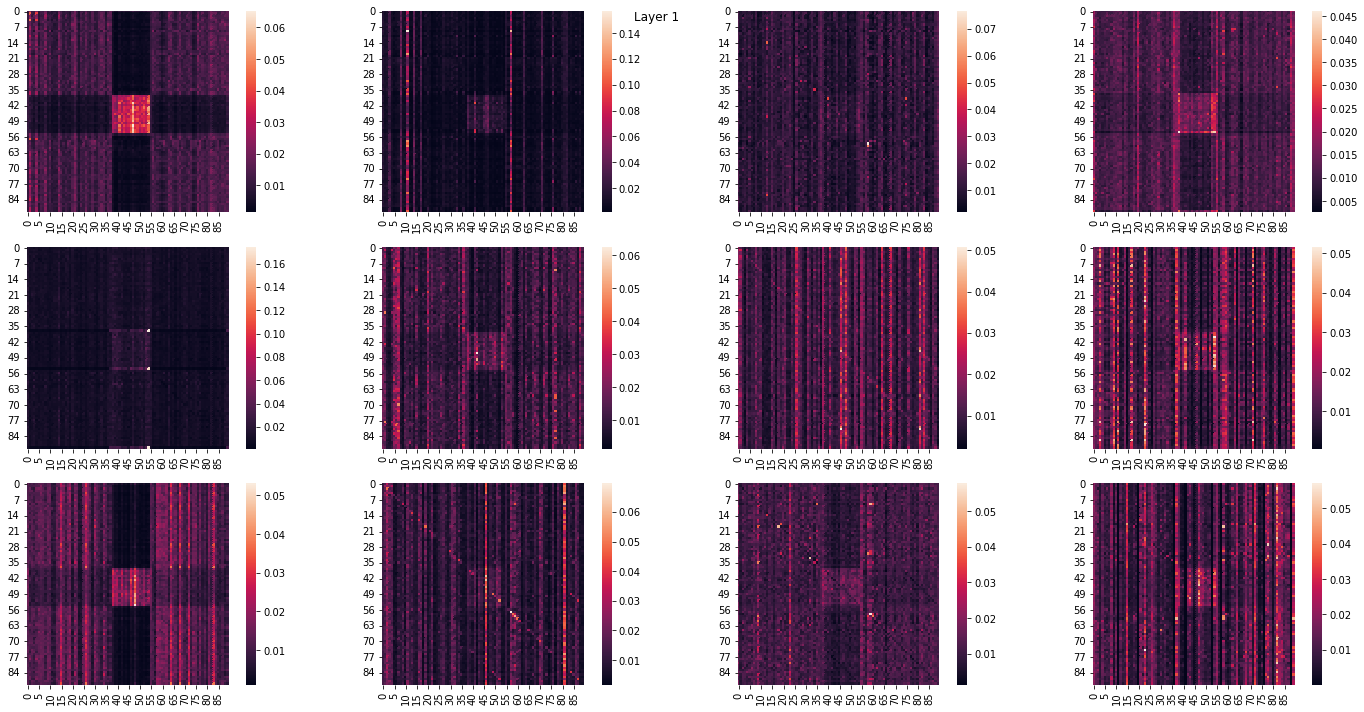

In [ ]:
# Plotting Layer-1 of the transformer
plot_attention_heads(attentions[0].squeeze(0), layer_name="Layer 1")

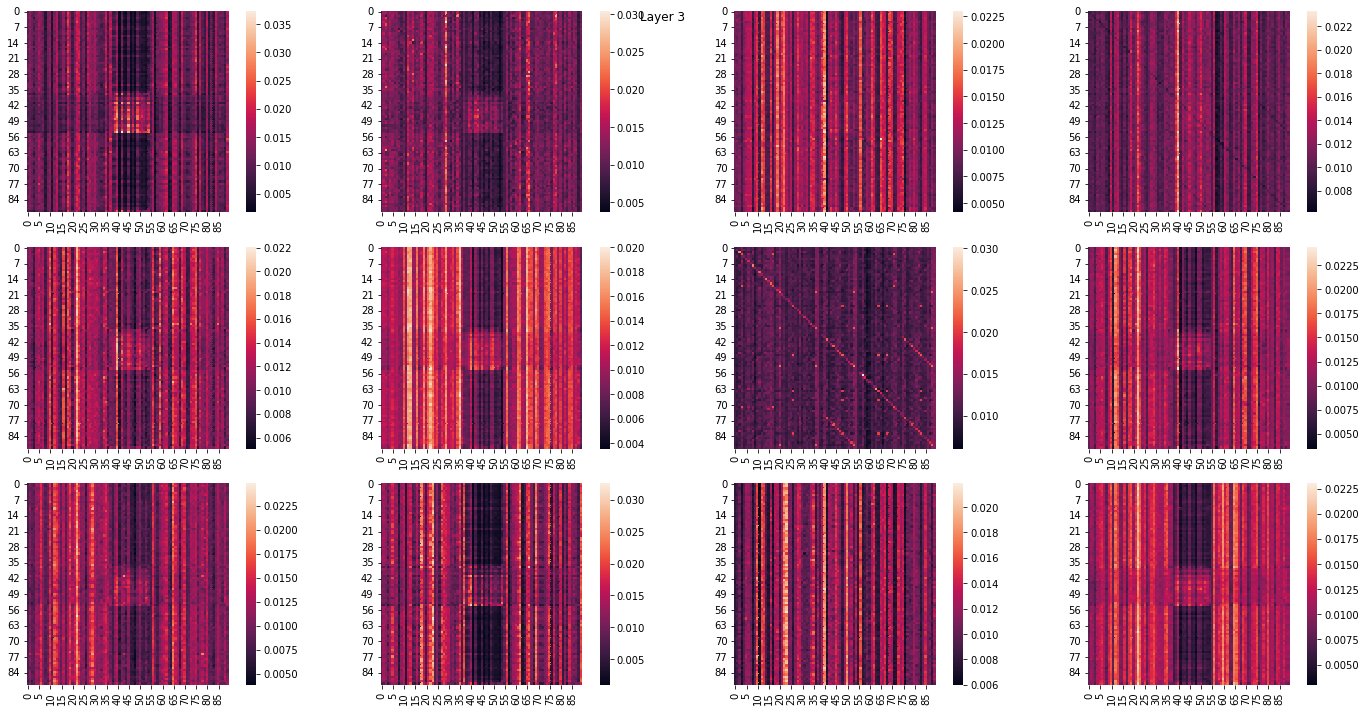

In [ ]:
# Plotting Layer-3 of the transformer
plot_attention_heads(attentions[2].squeeze(0), layer_name="Layer 3")

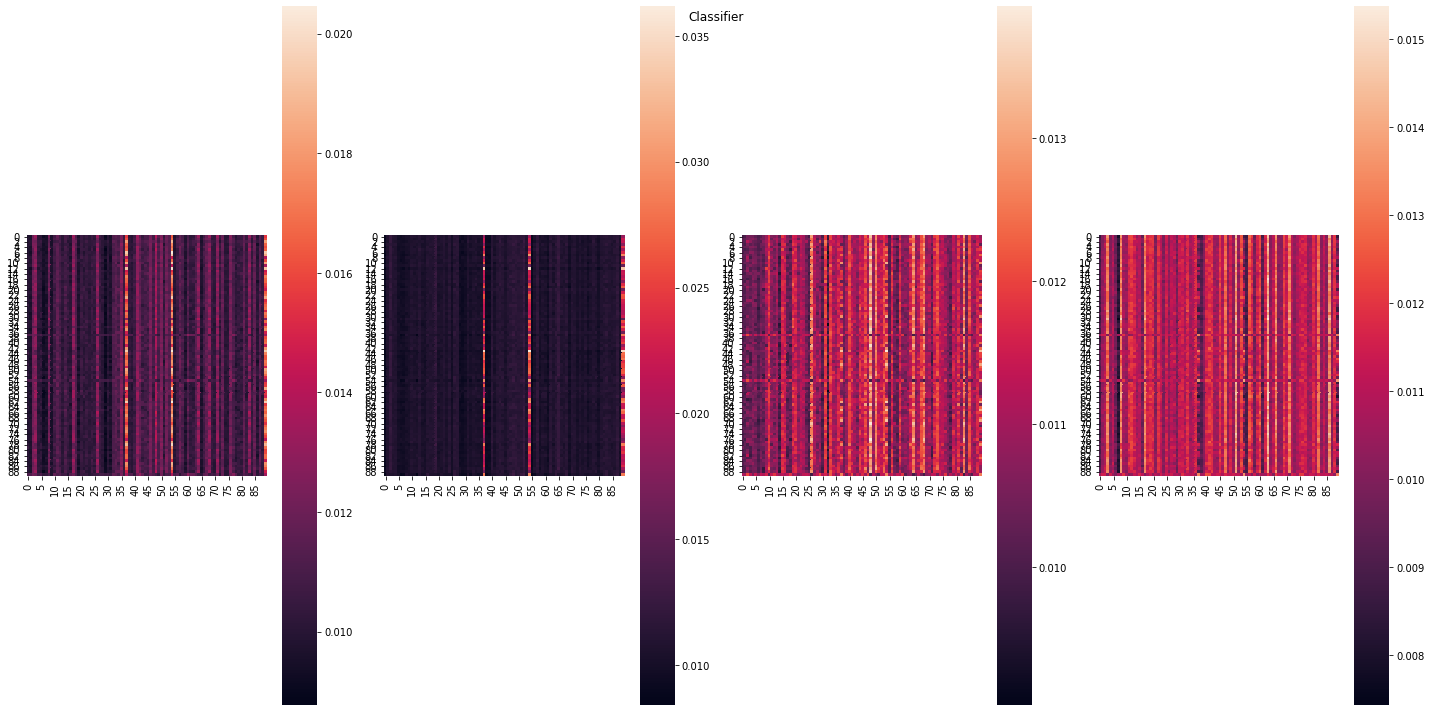

In [ ]:
# Plotting classifier's attention
plot_attention_heads(CLS_attention, layer_name="Classifier")

<a name="q5"></a>
[[^^^]](#outline) 

### **Q5: Attention Plots**
Using `plot_attention_heads` conduct a qualitative study on what the attention is doing in the transformer layers and the last classifier layer. 

Mainly, looking at **4** different types of tokens (e.g., nouns, etc.) in the example `sample_article`, plot the attention weights for those tokens and explain what you see on the plots. Mention the patterns that happen across layers and across heads and try to explain why the model is behaving this way. 

#### **A5:** 
1. The pattern of Layer 3 is less dark than Layer 1, this is because the latter layer learn more patterns than the earlier layer.
2. For the 12 heads, many heads has different patterns. For example, for the first col, first row, the pattern is like a square, but for the third col, second row, the pattern is a diagonal line. This is because distinct syntactic, semantic, and discourse relationships can hold between verbs and their arguments in a sentence. And different heads can capture the different relationship

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [ ]:
from nltk import pos_tag, word_tokenize
word_pos = pos_tag(a, tagset='universal')
# for i in range(len(word_pos)):
#     if word_pos[i][1] == 'NOUN'
# l = [(word, tag) for word, tag in word_pos if tag == 'NOUN']
noun_indices = [0 for _ in range(len(word_pos))]
for i in range(len(word_pos)):
    if word_pos[i][1] == 'NOUN':
        noun_indices[i] = 1
verb_indices = [i for i in range(len(word_pos)) if word_pos[i][1] == 'VERB']
adj_indices = [i for i in range(len(word_pos)) if word_pos[i][1] == 'ADJ']
adp_indices = [i for i in range(len(word_pos)) if word_pos[i][1] == 'ADP']
print(noun_indices)
print(verb_indices)
print(adj_indices)
print(adp_indices)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[6, 7, 9, 13, 22, 24, 25, 32, 37, 42, 52, 54, 62, 67, 77, 87, 89]
[27, 30, 38, 45, 49, 55, 59, 69, 74, 80, 84]
[2, 3, 14, 17, 29, 33, 47, 63, 71, 82]
